In [ ]:
ShelfImages\labels

In [32]:
import pandas as pd
df = pd.read_csv("test_labelD.csv")

In [33]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.head()

,image_name,x_i,y_i,w_i,h_i,b_i
0,C1_P02_N1_S5_1.JPG,1032,2080,1204,2408,0
1,C1_P02_N1_S5_1.JPG,1040,1092,1192,1392,0
2,C1_P02_N1_S5_1.JPG,1040,1600,1224,1892,0
3,C1_P02_N1_S5_1.JPG,1088,616,1236,920,0
4,C1_P02_N1_S5_1.JPG,1128,124,1308,436,0


In [37]:
im = cv2.imread('ShelfImages/images/val/'+df.image_name[1])

In [39]:
w,h,_ = im.shape

In [42]:
l=[]
for i in range(len(df)):
    im = cv2.imread('ShelfImages/images/val/'+df.image_name[i])
    l.append(im.shape)

In [43]:
l

[(2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 2614, 3),
 (2448, 3264, 3),
 (2448, 3264, 3),
 (2448, 3264, 3),
 (2448, 3264, 3),
 (2448, 3264, 3),
 (2448, 3264, 3),
 (2448, 3264, 3),
 (2448, 3264, 3),
 (2448, 3264, 3),
 (2448, 32

In [44]:
wit = []
hit = []

for i in range(len(l)):
    hit.append(l[i][0]) 
    wit.append(l[i][1])

In [45]:
df["xi"] = df.x_i/wit
df["yi"] = df.y_i/hit
df["wi"] = df.w_i/wit
df["hi"] = df.h_i/hit


In [47]:
len(df)

2648

In [48]:
df.drop(["x_i","y_i","w_i","h_i"],axis=1,inplace=True)

In [49]:
df.to_csv("testnormalized.csv")

In [ ]:
Uvalues = df.image_name.unique()

In [ ]:
for img_name in range(len(Uvalues)):
  filenameL = Uvalues[img_name].split(".")[0]
  tempfile = open("ShelfImages/labels/train/" +filenameL + ".txt","a+")
  for i in range(len(df)):
    filenameI = df.image_name[i].split(".")[0]
    if filenameL == filenameI :
      fline = str(df.b_i[i])+" "+str(df.x_i[i])+" "+str(df.y_i[i])+" "+str(df.w_i[i])+" "+str(df.h_i[i])+"\n"
      tempfile.writelines(fline) 

  tempfile.close()

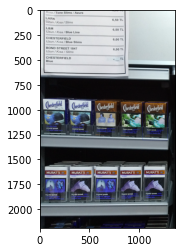

In [10]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\Danish Ahmed\ShelfImages\images\train\C1_P01_N1_S2_1.JPG")
dh, dw, _ = img.shape

fl = open(r"C:\Users\Danish Ahmed\ShelfImages\labels\train\C1_P01_N1_S2_1.txt", 'r')
data = fl.readlines()
fl.close()
_, x, y, w, h = map(float, data[1].split(' '))
# for dt in data:

#     # Split string to float
#     _, x, y, w, h = map(float, dt.split(' '))

# #     # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
# #     # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
# #     l = int((x - w / 2) * dw)
# #     r = int((x + w / 2) * dw)
# #     t = int((y - h / 2) * dh)
# #     b = int((y + h / 2) * dh)
    
# #     if l < 0:
# #         l = 0
# #     if r > dw - 1:
# #         r = dw - 1
# #     if t < 0:
# #         t = 0
# #     if b > dh - 1:
# #         b = dh - 1

#     cv2.rectangle(img, (x, y), (w, h), (0, 0, 255), 5)
cv2.rectangle(img, (int(x), int(y)), (int(w), int(h)), (0, 0, 255), 1)
plt.imshow(img)
plt.show()